<a href="https://colab.research.google.com/github/zarakkhan36/GenAI/blob/main/HW2/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [17]:
# Zarak Khan
# The purpose of this assignment is to compare the performance of
# an MLP and CNN using strides on the CIFAR-10 dataset

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [18]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()


In [7]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[6 9 9 4 1 1 2 7 8 3]


## 2. Build the model <a name="build"></a>

In [8]:


# Create MLP model using Sequential
def create_mlp_model(input_shape):

    # Create instance of Sequential model
    model = models.Sequential()

    # Flatten the input
    model.add(layers.Flatten(input_shape=input_shape))

    # Add a dense layer with 200 units with relu activation
    model.add(layers.Dense(200, activation="relu"))

    # Add dropout layer to prevent overfitting (30%)
    model.add(layers.Dropout(0.3))

    # Add a dense layer with 150 units and relu activation
    model.add(layers.Dense(150, activation="relu"))

    # Add second dropout layer to prevent overfitting (30%)
    model.add(layers.Dropout(0.3))

    # Add output layer with number of class units (10) and softmax activation
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))

    # Print model summary
    model.summary()

    # Return the model
    return model




## 3. Train the model <a name="train"></a>

In [9]:
## Create instance of MLP model
mlp_model = create_mlp_model(input_shape=(32, 32, 3))

# Create instance of Adam optimizer with learning rate
opt = optimizers.Adam(learning_rate=0.0005)

# Compile the model
mlp_model.compile(
    loss="sparse_categorical_crossentropy",  # Use sparse_categorical_crossentropy
    optimizer=opt,  # Use the Adam optimizer
    metrics=["accuracy"]  # Track the accuracy
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Create history object for storing training data
mlp_history = mlp_model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.2)

mlp_model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3641 - loss: 1.7511 - val_accuracy: 0.4190 - val_loss: 1.6886
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3668 - loss: 1.7400 - val_accuracy: 0.4155 - val_loss: 1.6790
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3714 - loss: 1.7387 - val_accuracy: 0.4294 - val_loss: 1.6770
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.3708 - loss: 1.7395 - val_accuracy: 0.4256 - val_loss: 1.6821
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3670 - loss: 1.7395 - val_accuracy: 0.4146 - val_loss: 1.7038
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3726 - loss: 1.7309 - val_accuracy: 0.4241 - val_loss: 1.6771
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3707 - loss: 1.7315 - val_accuracy: 0.4211 - val_loss: 1.6865
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3653 -

## 4. Evaluation <a name="evaluate"></a>

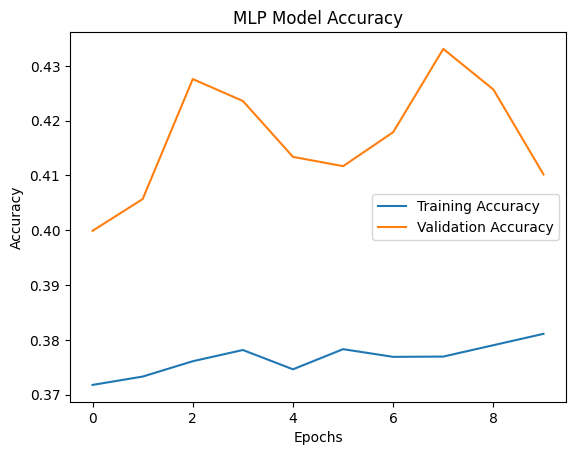

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4055 - loss: 1.6630


[1.670686960220337, 0.4050999879837036]

In [14]:
# Plot training and validation accuracy
plt.plot(mlp_model.history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_model.history.history['val_accuracy'], label='Validation Accuracy')

# Create plot titles and labels
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display legend
plt.legend()

# Show plot
plt.show()

mlp_model.evaluate(x_test, y_test)

In [15]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = mlp_model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[y_test]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


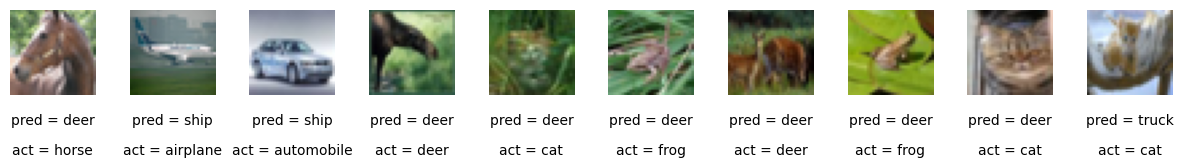

In [16]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)